In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.applications import vgg16


Using TensorFlow backend.


In [2]:
train_path = '/Users/jimmyfu87/JupyterNotebook/Dataset/intel-image-classification/small/seg_train/seg_train'
valid_path = '/Users/jimmyfu87/JupyterNotebook/Dataset/intel-image-classification/small/seg_test/seg_test'
#test_path = '/Users/jimmyfu87/Documents/JupyterNotebook/Dataset/intel-image-classification/seg_pred/seg_pred'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['buildings', 'forest','glacier','mountain','sea','street'],batch_size=8)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['buildings', 'forest','glacier','mountain','sea','street'],batch_size=8)
#test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['buildings', 'forest','glacier','mountain','sea','street'])

Found 357 images belonging to 6 classes.
Found 196 images belonging to 6 classes.


In [4]:
print(len(train_batches))

45


# Resnet50 

In [5]:
# vgg19_model = keras.applications.vgg19.VGG19()
resnet_model= keras.applications.resnet_v2.ResNet50V2()

In [6]:
# model = Sequential()
# for layer in vgg19_model.layers:
#      model.add(layer)
# model.summary()

In [7]:
model = Sequential()
model.add(resnet_model)
#model.summary()
# model = Sequential()
# for layer in resnet_model.layers:
#      model.add(layer)


In [8]:
for layer in model.layers[:-1]:
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 1000)              25613800  
Total params: 25,613,800
Trainable params: 25,568,360
Non-trainable params: 45,440
_________________________________________________________________


In [9]:
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 1000)              25613800  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6006      
Total params: 25,619,806
Trainable params: 25,574,366
Non-trainable params: 45,440
_________________________________________________________________


In [10]:
model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_history=model.fit_generator(train_batches,validation_data=valid_batches,epochs=10,verbose=1,validation_steps=3)

Epoch 1/10
45/45 [==============================] - 237s 5s/step - loss: 1.7372 - accuracy: 0.7199 - val_loss: 1.7354 - val_accuracy: 0.5833
Epoch 2/10
45/45 [==============================] - 238s 5s/step - loss: 1.7321 - accuracy: 0.7647 - val_loss: 1.7448 - val_accuracy: 0.5417
Epoch 3/10
45/45 [==============================] - 218s 5s/step - loss: 1.7253 - accuracy: 0.7479 - val_loss: 1.7208 - val_accuracy: 0.7083
Epoch 4/10
45/45 [==============================] - 205s 5s/step - loss: 1.7218 - accuracy: 0.7451 - val_loss: 1.7303 - val_accuracy: 0.5833
Epoch 5/10
45/45 [==============================] - 220s 5s/step - loss: 1.7165 - accuracy: 0.8011 - val_loss: 1.7223 - val_accuracy: 0.5833
Epoch 6/10
45/45 [==============================] - 242s 5s/step - loss: 1.7137 - accuracy: 0.8039 - val_loss: 1.7659 - val_accuracy: 0.5417
Epoch 7/10
45/45 [==============================] - 208s 5s/step - loss: 1.7112 - accuracy: 0.8235 - val_loss: 1.7427 - val_accuracy: 0.6250
Epoch 8/10
45

In [13]:
model.save("scene-resnet50.h5")

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

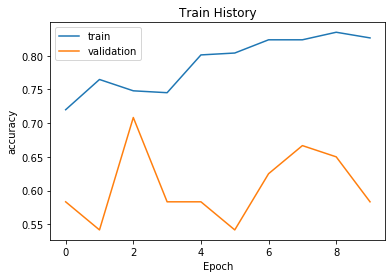

In [15]:
show_train_history(train_history,'accuracy','val_accuracy')

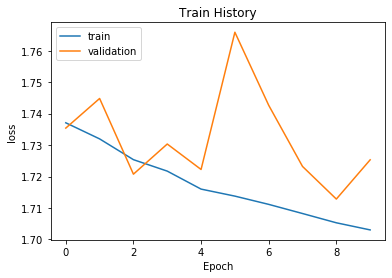

In [16]:
show_train_history(train_history,'loss','val_loss')